In [1]:
import os
os.chdir('../..')
!ls

product_impacts


In [2]:
import os.path
import pandas as pd
from skimpy import skim
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

sns.set()

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
os.environ["RAY_ENABLE_MAC_LARGE_OBJECT_STORE"] = "1"

In [3]:
# enter path here
data_dir = '../../future_of_food/openfoodfacts/sample1/'

In [4]:
pred_nn = pd.read_csv(f'{data_dir}/predictions/predictions_nn.csv')
pred_rf = pd.read_csv(f'{data_dir}/predictions/predictions_rf.csv')

In [10]:
pred_nn.sample(20)

,product_id,product_name_en,ingredients_text_en,stores,countries,tsne_0,tsne_1,parentcategory,mainfoodgroup,subfoodgroup,parentcategory_prob,subfoodgroup_prob
1716,5225,Sauce Carbonara pour pâtes,"water, buttermilk 5%, thickener (modified corn...","Woolworths, Coles","Australia, France",-38.254673,-39.386223,Cereals and Cereal Products,"Pasta, rice and other miscellaneous cereals",Pasta,0.527484,0.849255
21446,155,heartland chips,"potatoes, high oleic sunflower oil, canola oil...",NaN,New Zealand,-37.925770,12.978567,"Vegetables, Potatoes","Chips, fried and roast potatoes and potato pro...",Chips purchased including takeaway,0.976721,0.999993
5057,43612,Wholewheat spaghetti,Durum Whole Wheat Semolina.\nSuitable for vege...,Asda,United Kingdom,-15.139441,-66.657910,Cereals and Cereal Products,"Pasta, rice and other miscellaneous cereals",Pasta,0.999199,0.999997
19890,14711,Peruvian cacoa,"organic cocoa mass, organic cocoa butter, orga...",Aldi,United Kingdom,50.356720,45.345300,"Sugar, Preserves and Confectionery",Chocolate confectionery,Chocolate confectionery,0.995743,0.999976
17,1209,Aspa,Aspa,NaN,New Zealand,14.542784,-31.449877,Alcoholic Beverages,Alcoholic Beverages,Alcoholic Beverages,0.999963,NaN
14654,28231,Baking Powder,"rasing agent,diphosphate,sodium carbonates,rac...",Lidl,United Kingdom,1.008249,-1.473103,Miscellaneous,Miscellaneous,Savoury sauces pickles gravies & condiments,0.579661,0.999836
569,30111,Natvia,"Ingredients Erythritol, Organic Steviol Glycos...",Tesco,"France, United Kingdom",31.513222,-9.507663,Artificial Sweeteners,Artificial Sweeteners,Artificial Sweeteners,0.999989,NaN
16510,53662,Apple & Mango Juice,"APPLE JUICE NOT FROM CONCENTRATE (85%), MANGO ...",NaN,United Kingdom,42.529820,-24.541973,Non-Alcoholic Beverages,Fruit juice,Fruit juice,0.999196,0.850969
20891,23932,JoyStixx Bag,"sugar,, glucose syrup, palm fat, humectant: so...",NaN,United Kingdom,34.938460,-0.546371,"Sugar, Preserves and Confectionery",Sugar confectionery,Sugar confectionery,0.999765,0.999961
6896,26762,Cooked & Peeled Prawns,"Prawn (crustacean),\nSalt",Tesco,United Kingdom,-49.227833,-49.814670,Fish and Fish Dishes,"Other white fish, shellfish and fish dishes",Shellfish,0.999985,1.000000


In [5]:
pred = pred_nn
pred.shape

(24153, 12)

Text(0.5, 1.0, 'sub category')

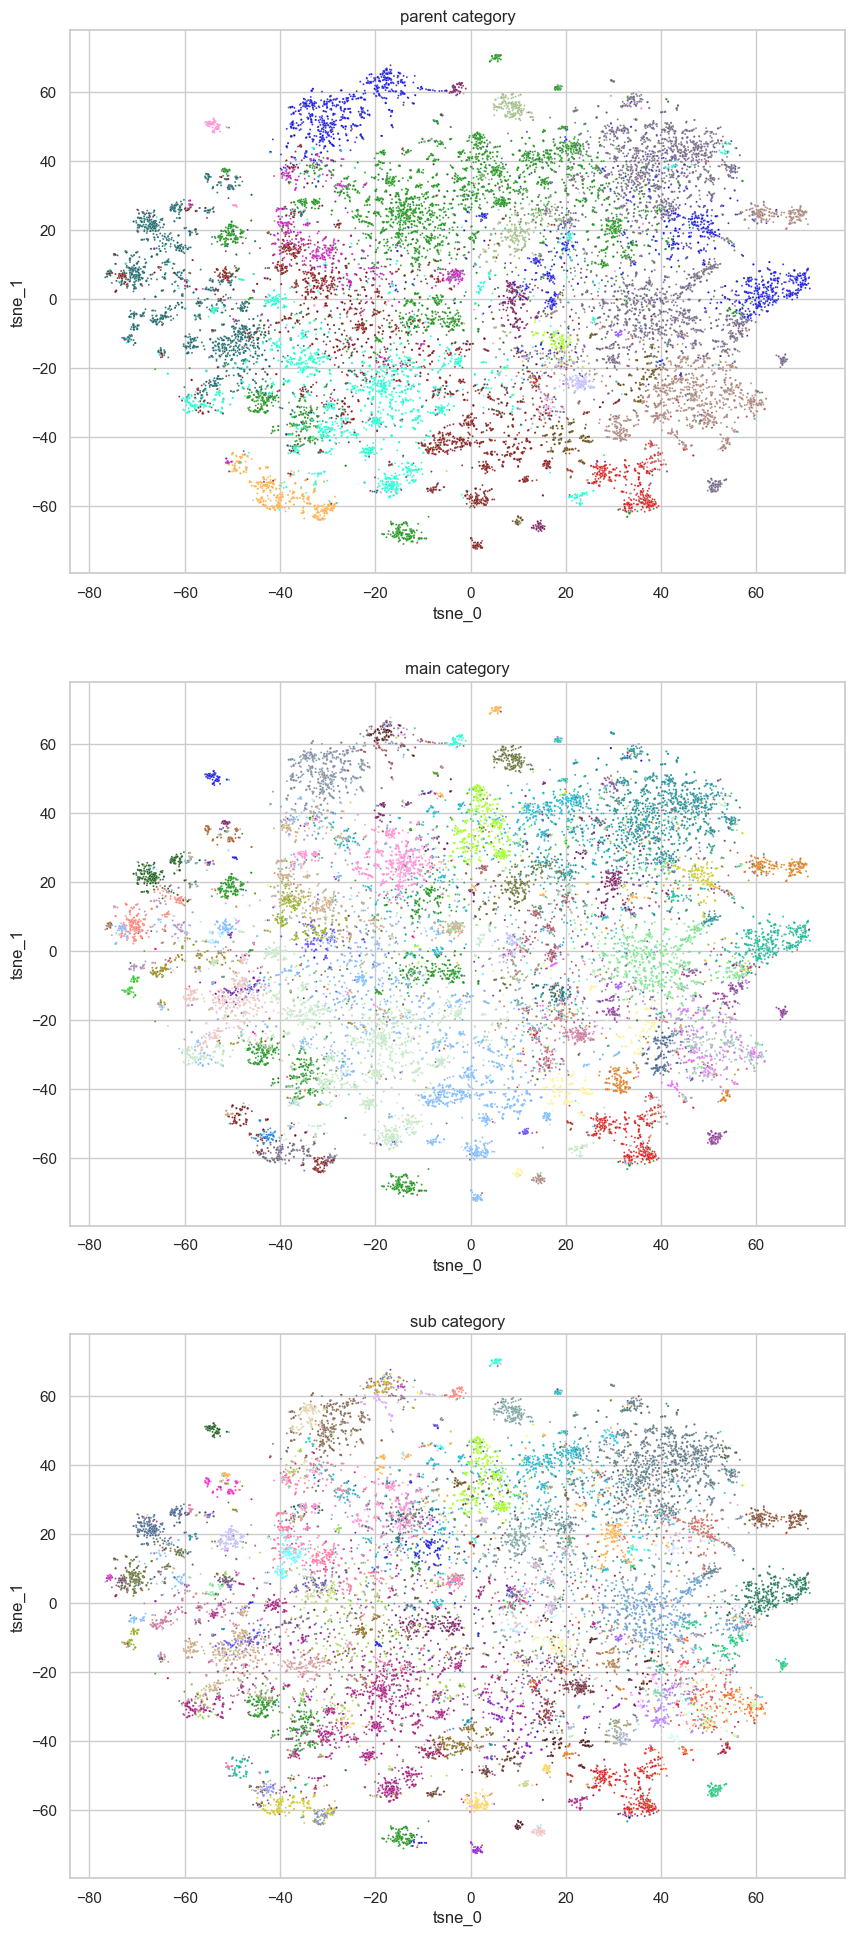

In [6]:
sns.set_style('whitegrid')
figure, axes = plt.subplots(3, 1, figsize=(10, 24))

sns.scatterplot(
    data=pred,
    x='tsne_0', y='tsne_1',
    hue='parentcategory',
    palette=sns.color_palette(cc.glasbey, n_colors=pred['parentcategory'].nunique()),
    legend=False,
    alpha=0.8,
    ax = axes[0],
    s=2
).set_title('parent category')

sns.scatterplot(
    data=pred,
    x='tsne_0', y='tsne_1',
    hue='mainfoodgroup',
    palette=sns.color_palette(cc.glasbey, n_colors=pred['mainfoodgroup'].nunique()),
    legend=False,
    alpha=0.8,
    ax = axes[1],
    s=2
).set_title('main category')

sns.scatterplot(
    data=pred,
    x='tsne_0', y='tsne_1',
    hue='subfoodgroup',
    palette=sns.color_palette(cc.glasbey, n_colors=pred['subfoodgroup'].nunique()),
    legend=False,
    alpha=0.8,
    ax = axes[2],
    s=2
).set_title('sub category')

In [7]:
pred['parentcategory'].value_counts()

parentcategory
Cereals and Cereal Products             5119
Sugar, Preserves and Confectionery      3222
Vegetables, Potatoes                    2720
Miscellaneous                           2679
Milk and Milk Products                  2434
Meat and Meat Products                  2142
Non-Alcoholic Beverages                 1751
Savoury Snacks                           812
Nuts and Seeds                           593
Alcoholic Beverages                      556
Fruit                                    553
Fish and Fish Dishes                     546
Fat Spreads                              418
Not Food                                 236
Eggs and Egg Dishes                      154
Dietary Supplements                      152
Artificial Sweeteners                     36
Commercial Toddlers Foods and Drinks      30
Name: count, dtype: int64

In [8]:
pred['subfoodgroup'].value_counts()

subfoodgroup
Savoury sauces pickles gravies & condiments                      2340
Chocolate confectionery                                          1623
Biscuits                                                         1366
Sugar confectionery                                               964
Savoury Snacks                                                    812
Pasta                                                             663
Other chicken and turkey                                          609
Nuts and Seeds                                                    593
White bread (not high fibre, not multiseed bread)                 587
Buns cakes and pastries                                           557
Alcoholic Beverages                                               556
Other cheese                                                      553
Yogurt                                                            525
High fibre breakfast cereals                                      498
Other v

In [9]:
pred.sample(100).sort_values(by=['parentcategory', 'subfoodgroup'])[['product_name_en', 'ingredients_text_en', 
                                                                     'stores', 'countries',
                                                                     'parentcategory', 'mainfoodgroup', 'subfoodgroup']].reset_index(drop=True)

,product_name_en,ingredients_text_en,stores,countries,parentcategory,mainfoodgroup,subfoodgroup
0,wine,cortereale cr. chardonnay vino varietale d'ita...,NaN,United Kingdom,Alcoholic Beverages,Alcoholic Beverages,Alcoholic Beverages
1,Wotsits,"maize, rapeseed oil, cheese flavour [dried che...",NaN,United Kingdom,Cereals and Cereal Products,Biscuits,Biscuits
2,Wheat biscuits,cere Nutrition 36 wheat biscuits fortified wit...,tesco,Ireland,Cereals and Cereal Products,Biscuits,Biscuits
3,Biscotti,"Sugar, apricot kernels 18%, egg white, milk so...",Woolworths,Australia,Cereals and Cereal Products,Biscuits,Biscuits
4,gingebread men,"ng (23%) [sugar, cocoa butter, whole ilk powde...",NaN,United Kingdom,Cereals and Cereal Products,Biscuits,Biscuits
5,Sultana surprise,"oats, vegetable oils (RSP certified sustainabl...",NaN,United Kingdom,Cereals and Cereal Products,Biscuits,Biscuits
6,Tasty Cheese Rice Crackers,"rice flour, tapioca flour, sunflower oil, corn...","Woolworths, Coles",Australia,Cereals and Cereal Products,Biscuits,Biscuits
7,Bixies,"94% wholegrain wheat , barley malt extract,...",Lidl,"Ireland, Malta",Cereals and Cereal Products,Biscuits,Biscuits
8,Chocolate brownie bites,"Sugar, Wheat Flour (_Wheat_ Flour, Calcium Car...",Tesco,United Kingdom,Cereals and Cereal Products,"Buns, cakes, pastries and fruit pies",Buns cakes and pastries
9,Prinzen Rolle,"wheat flour, sugar, vegetable fats (palm, palm...",NaN,Vereinigtes Königreich,Cereals and Cereal Products,"Buns, cakes, pastries and fruit pies",Buns cakes and pastries


In [10]:
skim(pred_nn)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 24153  │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA    ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ product_id            │     0 │     0 │   24000 │  30000 │     1 │  6900 │ 18000 │ 34000 │ 540000 │   ▇    │  │
│ │ tsne_0                │     0 │     0 │   0.022 │     36 │   -77 │   -30 │  0.33 │    31 │     71 │ ▃▇▇▇▇▅ │  │
│ │ tsne_1                │     0 │     0 │  -0.032 │     33 │   -73 │   -26 │   0.4 │    26 │     71 │ ▃▆▇▇▇▃ │  │
│ │ parentcategory_prob   │     0 │     0 │    0.94 │   0.13 │  0.18 │  0.97 │     1 │     1 │      1 │     ▁▇ │  │
│ │ subfoodgroup_prob     │  2415 │    10 │    0.95 │   0.12 │  0.25 │  0.98 │     1 │     1 │      1 │      ▇ │  │
│ └───────────────────────┴───────┴───────┴─────────┴────────┴───────┴───────┴───────┴───────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA         ┃ NA %     ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ product_name_en                    │          0 │        0 │                     3.3 │               79297 │  │
│ │ ingredients_text_en                │          0 │        0 │                      38 │              927608 │  │
│ │ stores                             │      12341 │     51.1 │                    0.64 │               15461 │  │
│ │ countries                          │          0 │        0 │                       2 │               48227 │  │
│ │ parentcategory                     │          0 │        0 │                       3 │               72991 │  │
│ │ mainfoodgroup                      │          0 │        0 │                     2.7 │               65867 │  │
│ │ subfoodgroup                       │          0 │        0 │                     3.3 │               80087 │  │
│ └────────────────────────────────────┴────────────┴──────────┴─────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [11]:
skim(pred_rf)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 24153  │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA    ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ product_id            │     0 │     0 │   24000 │  30000 │     1 │  6900 │ 18000 │ 34000 │ 540000 │   ▇    │  │
│ │ tsne_0                │     0 │     0 │   0.022 │     36 │   -77 │   -30 │  0.33 │    31 │     71 │ ▃▇▇▇▇▅ │  │
│ │ tsne_1                │     0 │     0 │  -0.032 │     33 │   -73 │   -26 │   0.4 │    26 │     71 │ ▃▆▇▇▇▃ │  │
│ │ parentcategory_prob   │     0 │     0 │    0.46 │   0.18 │  0.11 │  0.31 │  0.44 │  0.59 │      1 │ ▃▇▇▅▃▁ │  │
│ │ subfoodgroup_prob     │  2224 │  9.21 │    0.55 │   0.24 │  0.12 │  0.33 │  0.53 │  0.76 │      1 │ ▆▇▇▆▆▆ │  │
│ └───────────────────────┴───────┴───────┴─────────┴────────┴───────┴───────┴───────┴───────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA         ┃ NA %     ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ product_name_en                    │          0 │        0 │                     3.3 │               79297 │  │
│ │ ingredients_text_en                │          0 │        0 │                      38 │              927608 │  │
│ │ stores                             │      12341 │     51.1 │                    0.64 │               15461 │  │
│ │ countries                          │          0 │        0 │                       2 │               48227 │  │
│ │ parentcategory                     │          0 │        0 │                     3.1 │               74499 │  │
│ │ mainfoodgroup                      │          0 │        0 │                     2.7 │               65635 │  │
│ │ subfoodgroup                       │          0 │        0 │                     3.3 │               79310 │  │
│ └────────────────────────────────────┴────────────┴──────────┴─────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [12]:
pred_compare = pred_nn.rename(columns={
    'parentcategory': 'parentcategory_nn',
    'mainfoodgroup': 'mainfoodgroup_nn',
    'subfoodgroup': 'subfoodgroup_nn',
    'parentcategory_prob': 'parentcategory_prob_nn',
    'subfoodgroup_prob': 'subfoodgroup_prob_nn'
}).merge(pred_rf.rename(columns={
    'parentcategory': 'parentcategory_rf',
    'mainfoodgroup': 'mainfoodgroup_rf',
    'subfoodgroup': 'subfoodgroup_rf',
    'parentcategory_prob': 'parentcategory_prob_rf',
    'subfoodgroup_prob': 'subfoodgroup_prob_rf'
}))

In [13]:
# rf confidence remains noisy and low in all cases, but maybe its even lower when both models dont agree, maybe more tuning is needed for rf?

In [14]:
# nn is quite confident when both models agree on predicted parent category
skim(pred_compare[pred_compare['parentcategory_nn']==pred_compare['parentcategory_rf']])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 21021  │ │ string      │ 10    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 6     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA    ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ product_id             │     0 │     0 │  24000 │  29000 │     1 │  7200 │ 19000 │ 34000 │ 530000 │   ▇    │  │
│ │ tsne_0                 │     0 │     0 │   -0.4 │     36 │   -77 │   -30 │  -1.3 │    31 │     71 │ ▃▇▇▇▇▅ │  │
│ │ tsne_1                 │     0 │     0 │   0.25 │     33 │   -73 │   -27 │   1.1 │    26 │     71 │ ▃▆▇▇▇▃ │  │
│ │ parentcategory_prob_nn │     0 │     0 │   0.96 │    0.1 │  0.18 │  0.99 │     1 │     1 │      1 │      ▇ │  │
│ │ subfoodgroup_prob_nn   │  1827 │  8.69 │   0.95 │   0.12 │  0.25 │  0.98 │     1 │     1 │      1 │      ▇ │  │
│ │ parentcategory_prob_rf │     0 │     0 │   0.49 │   0.18 │  0.11 │  0.35 │  0.47 │  0.62 │      1 │ ▂▇▇▆▃▁ │  │
│ │ subfoodgroup_prob_rf   │  1827 │  8.69 │   0.57 │   0.24 │  0.12 │  0.37 │  0.56 │  0.78 │      1 │ ▅▇▇▇▆▇ │  │
│ └────────────────────────┴───────┴───────┴────────┴────────┴───────┴───────┴───────┴───────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA         ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ product_name_en                   │          0 │          0 │                     3.3 │              69761 │  │
│ │ ingredients_text_en               │          0 │          0 │                      38 │             799981 │  │
│ │ stores                            │      10464 │      49.78 │                    0.65 │              13753 │  │
│ │ countries                         │          0 │          0 │                       2 │              42294 │  │
│ │ parentcategory_nn                 │          0 │          0 │                     3.1 │              64856 │  │
│ │ mainfoodgroup_nn                  │          0 │          0 │                     2.8 │              58265 │  │
│ │ subfoodgroup_nn                   │          0 │          0 │                     3.3 │              69022 │  │
│ │ parentcategory_rf                 │          0 │          0 │                     3.1 │              64856 │  │
│ │ mainfoodgroup_rf                  │          0 │          0 │                     2.7 │              57805 │  │
│ │ subfoodgroup_rf                   │          0 │    

In [15]:
# nn is quite confident (lev 0 and lev 2) when both models agree on lev 0 and lev 2 classes
skim(pred_compare[(pred_compare['parentcategory_nn']==pred_compare['parentcategory_rf'])
             & (pred_compare['subfoodgroup_nn']==pred_compare['subfoodgroup_rf'])])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 19314  │ │ string      │ 10    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 6     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA    ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ product_id             │     0 │     0 │  25000 │  29000 │     1 │  7500 │ 19000 │ 34000 │ 530000 │   ▇    │  │
│ │ tsne_0                 │     0 │     0 │  -0.56 │     37 │   -77 │   -31 │  -1.3 │    32 │     71 │ ▃▇▇▇▇▅ │  │
│ │ tsne_1                 │     0 │     0 │  -0.29 │     34 │   -73 │   -27 │  0.37 │    26 │     71 │ ▃▇▇▇▇▃ │  │
│ │ parentcategory_prob_nn │     0 │     0 │   0.96 │  0.098 │  0.21 │  0.99 │     1 │     1 │      1 │      ▇ │  │
│ │ subfoodgroup_prob_nn   │  1827 │  9.46 │   0.97 │  0.089 │  0.26 │  0.99 │     1 │     1 │      1 │      ▇ │  │
│ │ parentcategory_prob_rf │     0 │     0 │   0.49 │   0.18 │  0.11 │  0.35 │  0.48 │  0.62 │      1 │ ▂▇▇▆▃▁ │  │
│ │ subfoodgroup_prob_rf   │  1827 │  9.46 │    0.6 │   0.23 │  0.12 │  0.41 │   0.6 │   0.8 │      1 │ ▃▇▇▇▇▇ │  │
│ └────────────────────────┴───────┴───────┴────────┴────────┴───────┴───────┴───────┴───────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA       ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ product_name_en                    │        0 │          0 │                     3.3 │               64214 │  │
│ │ ingredients_text_en                │        0 │          0 │                      38 │              731057 │  │
│ │ stores                             │     9578 │      49.59 │                    0.65 │               12645 │  │
│ │ countries                          │        0 │          0 │                       2 │               39069 │  │
│ │ parentcategory_nn                  │        0 │          0 │                     3.1 │               59200 │  │
│ │ mainfoodgroup_nn                   │        0 │          0 │                     2.7 │               53102 │  │
│ │ subfoodgroup_nn                    │        0 │          0 │                     3.3 │               63033 │  │
│ │ parentcategory_rf                  │        0 │          0 │                     3.1 │               59200 │  │
│ │ mainfoodgroup_rf                   │        0 │          0 │                     2.7 │               53102 │  │
│ │ subfoodgroup_rf                    │        0 │     

In [16]:
# nn confidence reduces (esp for lev 2) when both models agree on lev 0 but disagree on lev 2, these are explored in next cell
skim(pred_compare[(pred_compare['parentcategory_nn']==pred_compare['parentcategory_rf'])
             & (pred_compare['subfoodgroup_nn']!=pred_compare['subfoodgroup_rf'])])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1707   │ │ string      │ 10    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 6     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50    ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ product_id              │   0 │     0 │  23000 │  32000 │     8 │  5000 │  15000 │ 31000 │ 520000 │   ▇    │  │
│ │ tsne_0                  │   0 │     0 │    1.4 │     33 │   -76 │   -21 │     -2 │    30 │     71 │ ▂▅▇▅▅▃ │  │
│ │ tsne_1                  │   0 │     0 │    6.4 │     30 │   -70 │   -17 │    7.5 │    29 │     69 │ ▁▅▇▇▇▃ │  │
│ │ parentcategory_prob_nn  │   0 │     0 │   0.94 │   0.13 │  0.18 │  0.96 │      1 │     1 │      1 │     ▁▇ │  │
│ │ subfoodgroup_prob_nn    │   0 │     0 │   0.77 │   0.19 │  0.25 │   0.6 │    0.8 │  0.95 │      1 │  ▁▃▃▃▇ │  │
│ │ parentcategory_prob_rf  │   0 │     0 │   0.44 │   0.17 │  0.11 │   0.3 │   0.41 │  0.56 │   0.93 │ ▃▇▇▅▃▁ │  │
│ │ subfoodgroup_prob_rf    │   0 │     0 │   0.29 │   0.11 │  0.12 │  0.21 │   0.26 │  0.35 │   0.81 │  ▇▇▃▁  │  │
│ └─────────────────────────┴─────┴───────┴────────┴────────┴───────┴───────┴────────┴───────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA      ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ product_name_en                     │       0 │         0 │                      3.2 │                5547 │  │
│ │ ingredients_text_en                 │       0 │         0 │                       40 │               68924 │  │
│ │ stores                              │     886 │      51.9 │                     0.65 │                1108 │  │
│ │ countries                           │       0 │         0 │                      1.9 │                3225 │  │
│ │ parentcategory_nn                   │       0 │         0 │                      3.3 │                5656 │  │
│ │ mainfoodgroup_nn                    │       0 │         0 │                        3 │                5163 │  │
│ │ subfoodgroup_nn                     │       0 │         0 │                      3.5 │                5989 │  │
│ │ parentcategory_rf                   │       0 │         0 │                      3.3 │                5656 │  │
│ │ mainfoodgroup_rf                    │       0 │         0 │                      2.8 │                4703 │  │
│ │ subfoodgroup_rf                     │       0 │     

In [17]:
pred_compare[(pred_compare['parentcategory_nn']==pred_compare['parentcategory_rf'])
             & (pred_compare['subfoodgroup_nn']!=pred_compare['subfoodgroup_rf'])].sample(100)[[
    'product_name_en', 'ingredients_text_en', 
    'parentcategory_nn', 'subfoodgroup_nn',
    'parentcategory_prob_nn', 'subfoodgroup_prob_nn', 
    'parentcategory_rf', 'subfoodgroup_rf',
    'parentcategory_prob_rf', 'subfoodgroup_prob_rf']].reset_index(drop=True)

,product_name_en,ingredients_text_en,parentcategory_nn,subfoodgroup_nn,parentcategory_prob_nn,subfoodgroup_prob_nn,parentcategory_rf,subfoodgroup_rf,parentcategory_prob_rf,subfoodgroup_prob_rf
0,Cumberland,"contains _barley_ malt, _wheat_",Cereals and Cereal Products,Other cereals,0.854585,0.998781,Cereals and Cereal Products,High fibre breakfast cereals,0.297845,0.189470
1,Wheat biscuits,"Wholegrain (96%) (Wheat), Sugar, Salt Blend (S...",Cereals and Cereal Products,High fibre breakfast cereals,0.999875,0.824575,Cereals and Cereal Products,Biscuits,0.772324,0.363498
2,Super soft TORTILLA PLAIN FLOUR,"WHEAT flour (69%)(with calcium, iron, niacin, ...",Cereals and Cereal Products,"White bread (not high fibre, not multiseed bread)",0.999739,0.875918,Cereals and Cereal Products,Other bread,0.704175,0.309826
3,Free from lactose light milk,pasteurised and homogenied reduced le enyme la...,Milk and Milk Products,Whole milk,0.999636,0.551714,Milk and Milk Products,Yogurt,0.601258,0.162476
4,barilla gluten-free elbows,"corn flour 94,5%, rice flour 5%, emulsifier (m...",Cereals and Cereal Products,Biscuits,0.997314,0.499180,Cereals and Cereal Products,Other cereals,0.543230,0.174390
5,Rowan Hill 6 Brown Sandwich thins,"Fortified Wheat Flour (_Wheat_ Flour, Calcium ...",Cereals and Cereal Products,"Brown, granary and wheatgerm bread",0.998642,0.989938,Cereals and Cereal Products,"White bread (not high fibre, not multiseed bread)",0.625071,0.315627
6,new berry fruits,"sugar, glucose syrup, water, gelling agent: pe...","Sugar, Preserves and Confectionery",Sugar confectionery,0.602028,0.852687,"Sugar, Preserves and Confectionery",Preserves,0.210314,0.490996
7,poppers,"chicken (49%), wheat flour [wheat flour, calci...",Cereals and Cereal Products,Other cereals,0.947927,0.899428,Cereals and Cereal Products,Biscuits,0.451751,0.228057
8,Coles Lactose Free Milk Full Cream,Ingredients: Ultra Heat Treated Australian F...,Milk and Milk Products,Whole milk,0.996837,0.700245,Milk and Milk Products,Other cheese,0.441673,0.191498
9,Garlic Butter Spread,"vegetable oil, butter 13%, water, garlic 9%, p...",Fat Spreads,Reduced fat spread (polyunsaturated),0.999995,0.658269,Fat Spreads,Butter,0.385341,0.271989


In [18]:
# nn confidence reduces (for both lev 0 and lev 2) when both models don't agree on parent category, these are explored in next cell
skim(pred_compare[pred_compare['parentcategory_nn']!=pred_compare['parentcategory_rf']])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3132   │ │ string      │ 10    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 6     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ product_id             │    0 │      0 │  23000 │  32000 │    13 │  5400 │ 16000 │ 31000 │ 540000 │   ▇    │  │
│ │ tsne_0                 │    0 │      0 │    2.9 │     33 │   -76 │   -27 │   9.3 │    31 │     71 │ ▂▆▅▇▇▂ │  │
│ │ tsne_1                 │    0 │      0 │   -1.9 │     28 │   -72 │   -22 │  -2.4 │    19 │     68 │ ▁▅▇▇▅▁ │  │
│ │ parentcategory_prob_nn │    0 │      0 │   0.78 │    0.2 │  0.21 │  0.63 │  0.84 │  0.97 │      1 │  ▁▂▃▃▇ │  │
│ │ subfoodgroup_prob_nn   │  588 │  18.77 │   0.91 │   0.16 │  0.26 │   0.9 │     1 │     1 │      1 │   ▁▁▁▇ │  │
│ │ parentcategory_prob_rf │    0 │      0 │   0.28 │  0.094 │  0.11 │  0.21 │  0.26 │  0.33 │   0.82 │  ▆▇▃▁  │  │
│ │ subfoodgroup_prob_rf   │  397 │  12.68 │   0.41 │   0.24 │  0.13 │  0.22 │   0.3 │  0.55 │   0.99 │ ▇▅▂▁▂▂ │  │
│ └────────────────────────┴──────┴────────┴────────┴────────┴───────┴───────┴───────┴───────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA       ┃ NA %       ┃ words per row           ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ product_name_en                    │        0 │          0 │                       3 │                9536 │  │
│ │ ingredients_text_en                │        0 │          0 │                      41 │              127627 │  │
│ │ stores                             │     1877 │      59.93 │                    0.55 │                1708 │  │
│ │ countries                          │        0 │          0 │                     1.9 │                5933 │  │
│ │ parentcategory_nn                  │        0 │          0 │                     2.6 │                8135 │  │
│ │ mainfoodgroup_nn                   │        0 │          0 │                     2.4 │                7602 │  │
│ │ subfoodgroup_nn                    │        0 │          0 │                     3.5 │               11065 │  │
│ │ parentcategory_rf                  │        0 │          0 │                     3.1 │                9643 │  │
│ │ mainfoodgroup_rf                   │        0 │          0 │                     2.5 │                7830 │  │
│ │ subfoodgroup_rf                    │        0 │     

In [19]:
pred_compare[(pred_compare['parentcategory_nn']!=pred_compare['parentcategory_rf'])].sample(100)[[
    'product_name_en', 'ingredients_text_en', 
    'parentcategory_nn', 'subfoodgroup_nn',
    'parentcategory_prob_nn', 'subfoodgroup_prob_nn', 
    'parentcategory_rf', 'subfoodgroup_rf',
    'parentcategory_prob_rf', 'subfoodgroup_prob_rf']].reset_index(drop=True)

,product_name_en,ingredients_text_en,parentcategory_nn,subfoodgroup_nn,parentcategory_prob_nn,subfoodgroup_prob_nn,parentcategory_rf,subfoodgroup_rf,parentcategory_prob_rf,subfoodgroup_prob_rf
0,"Pea, mint, feta","Peas (52%), Water, Spinach, Soured Cream (Cows...","Vegetables, Potatoes",Other vegetable products and dishes,0.760805,0.983613,Miscellaneous,Savoury sauces pickles gravies & condiments,0.215877,0.794406
1,Spaghetti carbonara sauce,"wheat flour (with calcium, iron, niacin (vitam...",Miscellaneous,Savoury sauces pickles gravies & condiments,0.795403,0.999847,Cereals and Cereal Products,Pasta,0.403819,0.744818
2,cacao powder,Cacao powder (100%).,Miscellaneous,Beverages dry weight,0.999703,1.000000,"Sugar, Preserves and Confectionery",Chocolate confectionery,0.231215,0.464240
3,Nutrise untra colour,made in belgium 1206377-nourishing colour crèm...,Not Food,Not Food,0.988801,NaN,"Sugar, Preserves and Confectionery",Sugar confectionery,0.180589,0.382964
4,Rooster Fries,"cooking. d in a light crispy batter ints l, ri...","Vegetables, Potatoes",Chips purchased including takeaway,0.980768,0.999211,Meat and Meat Products,Other chicken and turkey,0.326575,0.307907
5,limes,lime,Fruit,Citrus fruit not canned,0.998539,0.999945,Alcoholic Beverages,Alcoholic Beverages,0.207971,NaN
6,Popcorn Kernels,Popcorn Kernels,Savoury Snacks,Savoury Snacks,0.540927,NaN,"Vegetables, Potatoes",Other vegetables,0.234441,0.272828
7,Chocolate Scotch Finger,"WHEAT FLOUR, SUGAR, BUTTER (CREAM (FROM MILK),...",Cereals and Cereal Products,Biscuits,0.932932,0.870086,"Sugar, Preserves and Confectionery",Chocolate confectionery,0.283255,0.544372
8,Apple sauce,"apple (91%), sugar, acidity regulator (330, 331).",Fruit,Apples and pears not canned,0.999753,0.994694,Miscellaneous,Savoury sauces pickles gravies & condiments,0.285453,0.832578
9,PRANA - RICH CHOCOLATE - POWER PLANT PROTEIN,"INGREDIENTS\nPea Protein, Rice protein, Natura...",Milk and Milk Products,Fromage frais and other dairy desserts,0.496121,0.819380,"Sugar, Preserves and Confectionery",Chocolate confectionery,0.203588,0.596890
